In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/wind/T1.csv')

In [5]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [9]:
df.head(3)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [13]:
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [20]:
df['Date/Time'].min(), df['Date/Time'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 23:50:00'))

# EDA

In [22]:
df_indexed = df.set_index('Date/Time')

In [24]:
df_indexed.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [162]:
daily = df_indexed.resample('D').mean()
monthly = df_indexed.resample('W').mean()

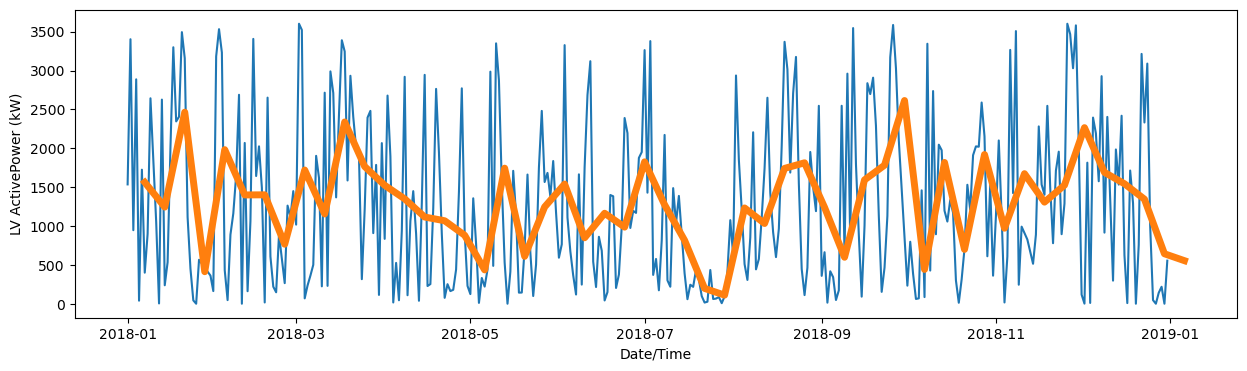

In [72]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['LV ActivePower (kW)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['LV ActivePower (kW)'], linewidth=5)
plt.show()

In [140]:
def get_time_features(df,date_col):
    df['month'] = df[date_col].dt.month
    df['week'] = df[date_col].dt.week
    df['dayofweek'] = df[date_col].dt.dayofweek
    df['day'] = df[date_col].dt.day
    df['hour'] = df[date_col].dt.hour
    
    return df

In [142]:
df_tf = get_time_features(df,'Date/Time')

C:\Users\druzh\AppData\Local\Temp\ipykernel_16708\3871232939.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df[date_col].dt.week


In [144]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,is_weekend,season,hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,winter,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,winter,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,winter,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,winter,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,winter,0


In [115]:
df_tf['dayofweek'][4]

0

In [146]:
lst = []
for i in range(len(df_tf)):
    if df_tf['dayofweek'][i] == 5 or df_tf['dayofweek'][i] == 6:
        lst.append(1)
    else:
        lst.append(0)
df_tf['is_weekend'] = lst

In [148]:
lst = []
for i in range(len(df_tf)):
    if df_tf['month'][i] in [1,2,12]:
        lst.append('winter')
    elif df_tf['month'][i] in [3,4,5]:
        lst.append('spring')
    elif df_tf['month'][i] in [6,7,8]:
        lst.append('summer')
    else:
        lst.append('autumn')
df_tf['season'] = lst

In [150]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,is_weekend,season,hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,winter,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,winter,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,winter,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,winter,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,winter,0


In [152]:
df_tf.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [205]:
lst = []
for i in range(len(df_tf)):
    if df_tf['hour'][i] in range(9,21):
        lst.append('1')
    else:
        lst.append('0')
df_tf['day/night'] = lst # it can be more complicated bu using the exact location of the turbine or at least a middle point in turkey to get the exact time for sun rise and down

In [207]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,is_weekend,season,hour,day/night
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,winter,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,winter,0,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,winter,0,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,winter,0,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,winter,0,0


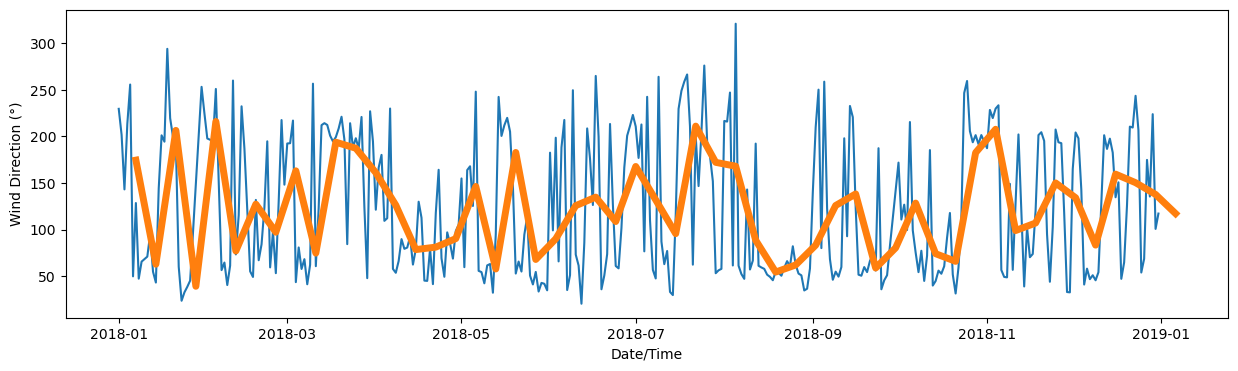

In [197]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['Wind Direction (°)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['Wind Direction (°)'], linewidth=5)
plt.show()

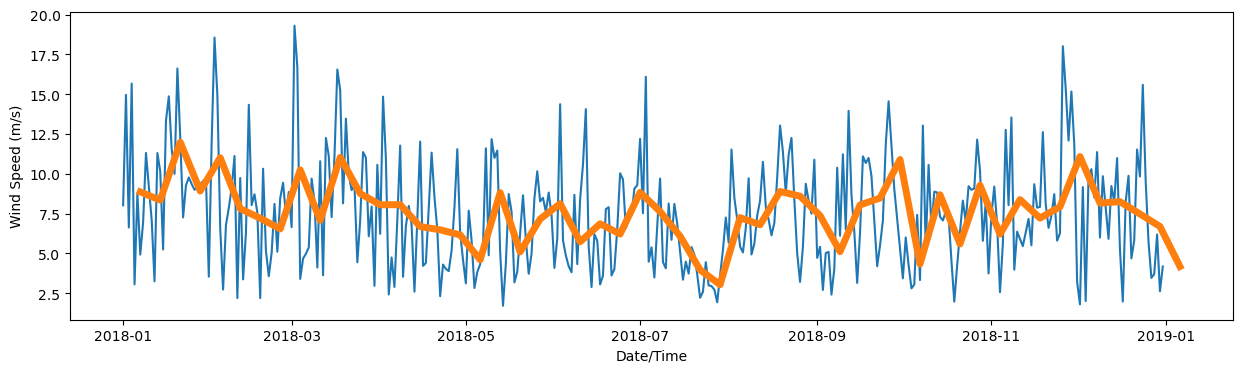

In [199]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['Wind Speed (m/s)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['Wind Speed (m/s)'], linewidth=5)
plt.show()

<Axes: >

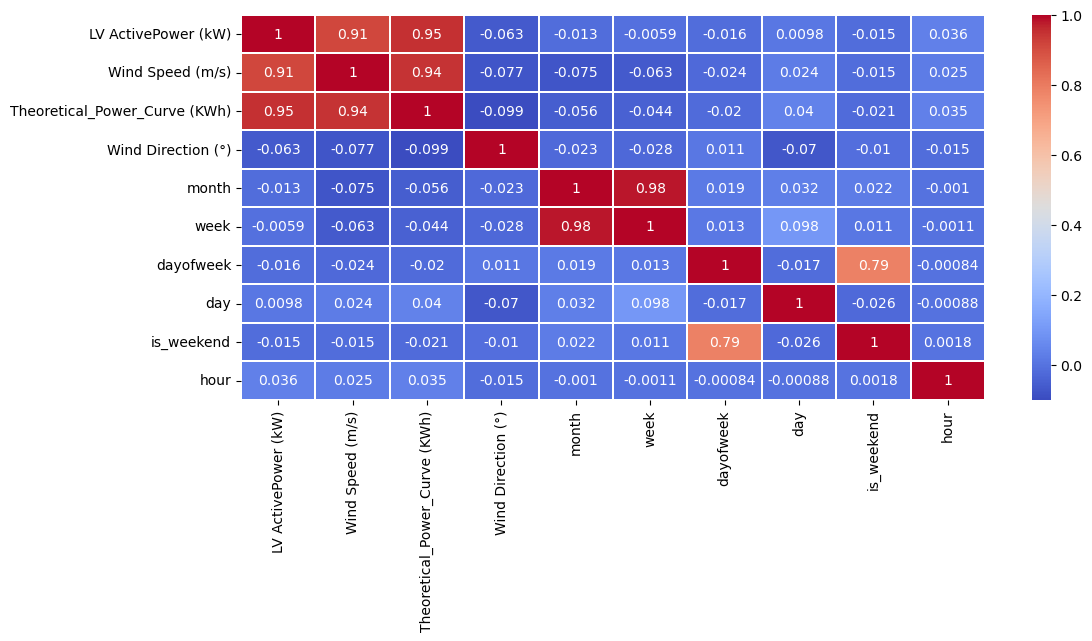

In [209]:
corr_matrix = df_tf.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True, linewidth=0.1, cmap='coolwarm')

In [213]:
df_tf = pd.get_dummies(df_tf, columns=['season'])

In [215]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,is_weekend,hour,day/night,season_autumn,season_spring,season_summer,season_winter
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,0,0,0,0,0,1
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,0,0,0,0,0,1
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,0,0,0,0,0,1
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,0,0,0,0,0,1
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,0,0,0,0,0,1


In [217]:
df_tf.drop('Date/Time',axis=1,inplace=True)

In [219]:
X=df_tf.copy()
y=X.pop('LV ActivePower (kW)')

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
X_train.columns

Index(['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)',
       'Wind Direction (°)', 'month', 'week', 'dayofweek', 'day', 'is_weekend',
       'hour', 'day/night', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor

model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    # CatBoostRegressor(random_state=42,verbose=False)
]

for model in models:
    model.fit(X_train_scaled , y_train)
    y_pred = model.predict(X_test_scaled)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))
    models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df.sort_values("R2_score", ascending = False)

C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
